<a href="https://colab.research.google.com/github/idarapatrick/Epileptic-Seizure-Detection-using-EEG-Data/blob/main/models_comparism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Models vs. Neural Network from Scratch
## Name: Idara Patrick Essien

#### Date: September 20, 2025




# Epileptic Seizure Detection using EEG Data
This project involves the construction and evaluation of machine learning models for detecting epileptic seizures from EEG signals. The work utilizes the Bangalore EEG Epilepsy Dataset (BEED), a comprehensive set of EEG segments from both healthy subjects and patients with various seizure types.

The central objective is a comparative study of two modeling strategies. First, classical machine learning classifiers, which are Logistic Regression and Random Forest, will be implemented and optimized using the scikit-learn library. Concurrently, a 3-layer feed-forward neural network will be built from scratch using only NumPy, which will provide insight into the fundamental mechanics of deep learning.

Model performance will be assessed using metrics essential for medical diagnostics, including accuracy, precision, recall, and the F1-score. A particular focus will be placed on the clinical consequences of model errors.

In [ ]:
# Core libraries for data manipulation and numerical operations
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for classical models, preprocessing, and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set visualization style
sns.set(style="whitegrid")

# Part 1: Dataset Selection, Loading, and Exploration
## 1.1 Dataset Justification and Citation
The BEED dataset was chosen for its direct application to a critical real-world health problem. Detecting epileptic seizures accurately and automatically can significantly improve patient care and diagnosis. This dataset provides a clean, balanced, and high-resolution basis for a meaningful classification task.

**Source:** BEED: Bangalore EEG Epilepsy Dataset.

**Citation:** N. . and N. BANU P K. "BEED: Bangalore EEG Epilepsy Dataset ," UCI Machine Learning Repository, 2024. [Online]. Available: https://doi.org/10.24432/C5K33B.

We will now load the data and perform an initial Exploratory Data Analysis (EDA) to understand its structure, distributions, and characteristics.


In [ ]:
# Load the Dataset

try:
    df = pd.read_csv("epilepsy.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: Dataset file not found. Please check the file path.")

Dataset loaded successfully!


## 1.2 Exploratory Data Analysis (EDA)
First, we'll get a high-level overview of the dataset. We'll use `.info()` to check for data types and null values, `.describe()` to get statistical summaries of the EEG features, and `.head()` to view the first few rows.

In [ ]:
# Initial Data Inspection

# Display the first 5 rows
print("First 10 rows of the dataset:")
display(df.head(10))

# Display concise summary (data types, non-null counts)
print("\nThe Dataset Info:")
df.info()

# Display statistical summary
print("\nStatistical Summary:")
display(df.describe())

First 10 rows of the dataset:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,4,7,18,25,28,27,20,10,-10,-18,-20,-16,13,32,12,10,0
1,87,114,120,106,76,54,28,5,-19,-49,-85,-102,-100,-89,-61,-21,0
2,-131,-133,-140,-131,-123,-108,-58,-51,-70,-77,-76,-76,-73,-57,-40,-14,0
3,68,104,73,34,-12,-26,-38,-36,-67,-88,-25,31,18,-4,6,-29,0
4,-67,-90,-97,-94,-86,-71,-43,-11,23,46,58,50,39,19,-9,-41,0
5,-47,-52,-45,-41,-29,-24,-21,-19,-13,-3,-2,4,11,14,11,14,0
6,-67,-30,7,33,51,79,105,122,132,115,83,42,10,-22,-47,-57,0
7,72,60,67,69,55,46,30,23,31,40,51,54,65,69,60,50,0
8,56,14,-12,-38,-73,-115,-137,-130,-78,-18,33,85,132,196,244,258,0
9,-17,-16,-12,13,53,84,77,57,24,-20,-39,-45,-40,-35,-19,-4,0



The Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      8000 non-null   int64
 1   X2      8000 non-null   int64
 2   X3      8000 non-null   int64
 3   X4      8000 non-null   int64
 4   X5      8000 non-null   int64
 5   X6      8000 non-null   int64
 6   X7      8000 non-null   int64
 7   X8      8000 non-null   int64
 8   X9      8000 non-null   int64
 9   X10     8000 non-null   int64
 10  X11     8000 non-null   int64
 11  X12     8000 non-null   int64
 12  X13     8000 non-null   int64
 13  X14     8000 non-null   int64
 14  X15     8000 non-null   int64
 15  X16     8000 non-null   int64
 16  y       8000 non-null   int64
dtypes: int64(17)
memory usage: 1.0 MB

Statistical Summary:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-1.490375,-2.189375,-3.23750,-4.119375,-1.821625,-2.311750,-3.398125,-3.448625,-1.647875,-2.56125,-3.524500,-4.782750,-2.164000,-2.910875,-4.355375,-4.113750,1.500000
std,36.824213,36.108088,35.80249,36.285268,37.621284,36.306006,36.358395,36.522214,38.107721,37.54068,37.343938,37.469582,38.144075,36.640555,36.242793,35.933601,1.118104
min,-281.000000,-255.000000,-255.00000,-257.000000,-264.000000,-277.000000,-277.000000,-260.000000,-290.000000,-302.00000,-276.000000,-306.000000,-288.000000,-290.000000,-323.000000,-317.000000,0.000000
25%,-7.000000,-7.000000,-7.00000,-10.000000,-10.000000,-8.000000,-8.000000,-7.000000,-7.000000,-8.00000,-8.000000,-11.000000,-10.000000,-8.000000,-9.000000,-6.000000,0.750000
50%,0.000000,0.000000,-1.00000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.00000,-1.000000,-2.000000,0.000000,0.000000,-2.000000,-1.000000,1.500000
75%,8.000000,8.000000,5.00000,7.000000,10.000000,8.000000,6.000000,5.000000,8.000000,8.00000,5.000000,7.000000,10.000000,9.000000,5.000000,4.000000,2.250000
max,252.000000,261.000000,238.00000,246.000000,249.000000,245.000000,220.000000,271.000000,280.000000,251.00000,262.000000,283.000000,296.000000,291.000000,251.000000,270.000000,3.000000


Next, we will analyze the distribution of our original target variable, y. The dataset description indicates there are four distinct classes, meaning that this is a **multi-class classification dataset**. Visualizing this will help us confirm the structure of the raw data before we process it for our binary classification task.

Original Target Variable Distribution:
y
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64


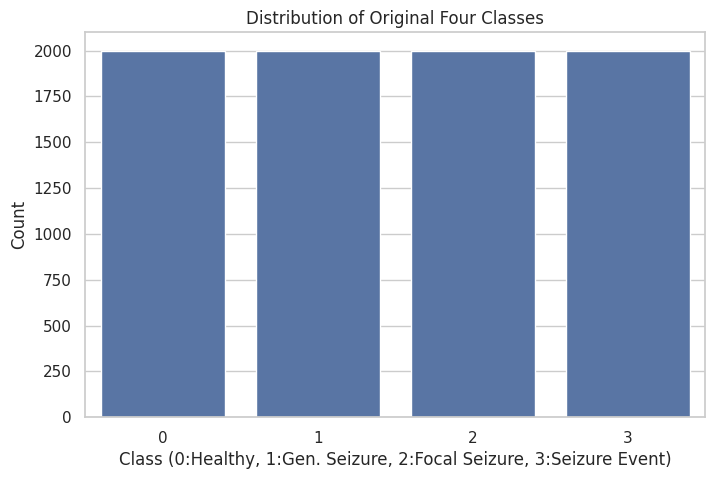

In [ ]:
# Analyze Original Multi-Class Target Variable

# Check the distribution of the original target variable "y"
print("Original Target Variable Distribution:")
print(df['y'].value_counts())

# Visualize the distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df)
plt.title('Distribution of Original Four Classes')
plt.xlabel('Class (0:Healthy, 1:Gen. Seizure, 2:Focal Seizure, 3:Seizure Event)')
plt.ylabel('Count')
plt.show()

## 1.3 Framing the Problem: Multi-Class to Binary Classification
The plot above confirms that our dataset is perfectly balanced across four distinct categories. For this project, we will focus on the critical clinical question of detecting the presence or absence of any seizure activity. This requires us to transform our multi-class problem into a binary classification problem.

We will create a new binary target where: `Class 0` ***(Healthy)*** remains 0 ***(Absence of seizure)***.

`Classes 1, 2, and 3` ***(all seizure types)*** are consolidated into 1 ***(Presence of seizure)***.

This is a justified simplification that aligns with our primary goal and allows us to build a model focused on the most important diagnostic question: "Does the patient have epilepsy or not?"

In [ ]:
# Transform Target Variable to Binary

# Apply the transformation: 0 stays 0, anything > 0 becomes 1.
df['y'] = (df['y'] > 0).astype(int)

print("Target variable successfully transformed to binary format.")
print("\nNew Target Variable Distribution:")
print(df['y'].value_counts())

Target variable successfully transformed to binary format.

New Target Variable Distribution:
y
1    6000
0    2000
Name: count, dtype: int64


Now that we have our binary target variable, let's visualize its new distribution. This reveals a crucial characteristic of our problem: class imbalance. The "Presence" class is now three times larger than the "Absence" class. This is an important finding that will influence how we split our data and evaluate our models later on. A simple accuracy score, for example, could be misleading on an imbalanced dataset.

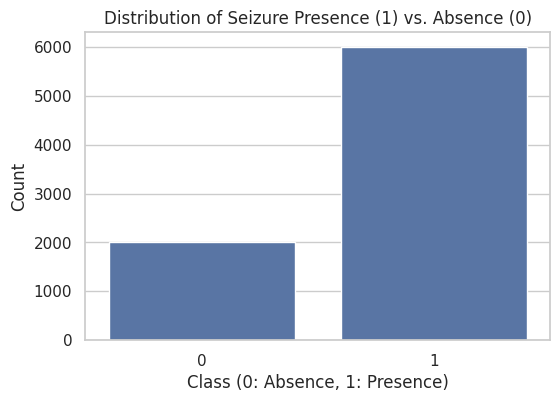

In [ ]:
# Analyze New Binary Target Variable

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Seizure Presence (1) vs. Absence (0)')
plt.xlabel('Class (0: Absence, 1: Presence)')
plt.ylabel('Count')
plt.show()

To understand the relationships between the 16 EEG channel features, we'll visualize a correlation matrix. A heatmap is an effective way to see which channels have strong positive or negative correlations. This can provide insights into which brain regions might be co-activated during the recorded events.

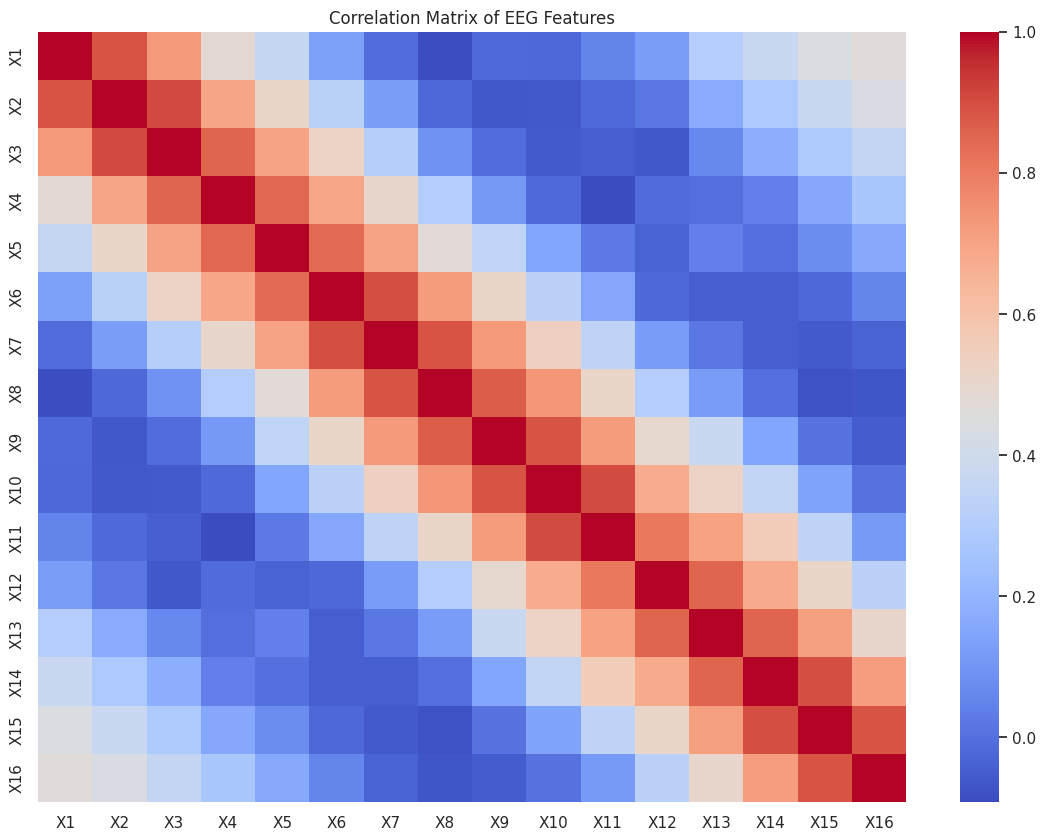

In [ ]:
# Feature Correlation Heatmap

# Select only the feature columns (X1 to X16)
features = df.drop("y", axis=1)

# Calculate the correlation matrix
corr_matrix = features.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm") # Changed colormap to 'plasma'
plt.title("Correlation Matrix of EEG Features")
plt.show()

## 1.4 Data Pre-processing: Splitting and Scaling
Now we prepare the data for modeling.

### Splitting the Data:
We'll divide the data into training and testing sets. Crucially, because our dataset is now imbalanced, we will use stratified splitting. This ensures that both the training and testing sets have the same proportion of seizure and non-seizure cases as the original dataset.

### Feature Scaling:
We'll use StandardScaler to standardize the features. We will fit the scaler only on the training data and then use it to transform both the training and testing data to prevent data leakage.

In [ ]:
# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training (80%) and testing (20%) sets
# Use stratify=y to ensure proportional splits for the imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\nTraining set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTesting set class distribution:\n", y_test.value_counts(normalize=True))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ON THE TRAINING DATA ONLY and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)

print("\nFeatures have been successfully scaled.")

Training set shape: (6400, 16)
Testing set shape: (1600, 16)

Training set class distribution:
 y
1    0.75
0    0.25
Name: proportion, dtype: float64

Testing set class distribution:
 y
1    0.75
0    0.25
Name: proportion, dtype: float64

Features have been successfully scaled.


The data is now fully pre-processed. We have separate, scaled training and testing sets ready for model implementation. We can now proceed to Part 2: Classical Machine Learning Models.

# Part 2: Classical Machine Learning Models
With our data pre-processed, we can now train and evaluate our classical models. We will start with Logistic Regression [2], a powerful and interpretable linear model that will serve as our baseline.

## 2.1 Experiment: The Impact of Class Weights on Logistic Regression
As discovered during EDA, our dataset is imbalanced. To address this, we will conduct an experiment by training two versions of the model:

1.   **Baseline Model:** A standard Logistic Regression model trained on the imbalanced data.
2.   **Balanced Model:** A Logistic Regression model that uses the `class_weight='balanced'` parameter to counteract bias.

This will allow us to directly measure the impact of this technique on model performance.

In [ ]:
# Train Baseline and Balanced Logistic Regression Models

# Initialize the Models
# Model A: Baseline
baseline_logreg = LogisticRegression(random_state=42)

# Model B: Balanced
balanced_logreg = LogisticRegression(random_state=42, class_weight='balanced')


# Train the Models
baseline_logreg.fit(X_train_scaled, y_train)
balanced_logreg.fit(X_train_scaled, y_train)

print("\nBoth models have been trained successfully.")


# Make Predictions on the Test Set
y_pred_baseline = baseline_logreg.predict(X_test_scaled)
y_pred_balanced = balanced_logreg.predict(X_test_scaled)


Both models have been trained successfully.


## 2.2 Evaluation and Comparison
We will now evaluate both models on the unseen test data. We'll compare their confusion matrices and a full suite of classification metrics.

Our hypothesis is that the Balanced Model will show a significant improvement in Recall for the minority class **(0)** and a better overall `F1-score`, even if its raw accuracy is slightly lower. This would indicate it's a more robust and less biased model for our medical diagnosis task.

--- Baseline Model Evaluation ---
              precision    recall  f1-score   support

 Absence (0)       0.93      0.24      0.38       400
Presence (1)       0.80      0.99      0.89      1200

    accuracy                           0.81      1600
   macro avg       0.87      0.62      0.63      1600
weighted avg       0.83      0.81      0.76      1600


--- Balanced Model Evaluation ---
              precision    recall  f1-score   support

 Absence (0)       0.35      0.58      0.44       400
Presence (1)       0.82      0.64      0.72      1200

    accuracy                           0.63      1600
   macro avg       0.59      0.61      0.58      1600
weighted avg       0.70      0.63      0.65      1600



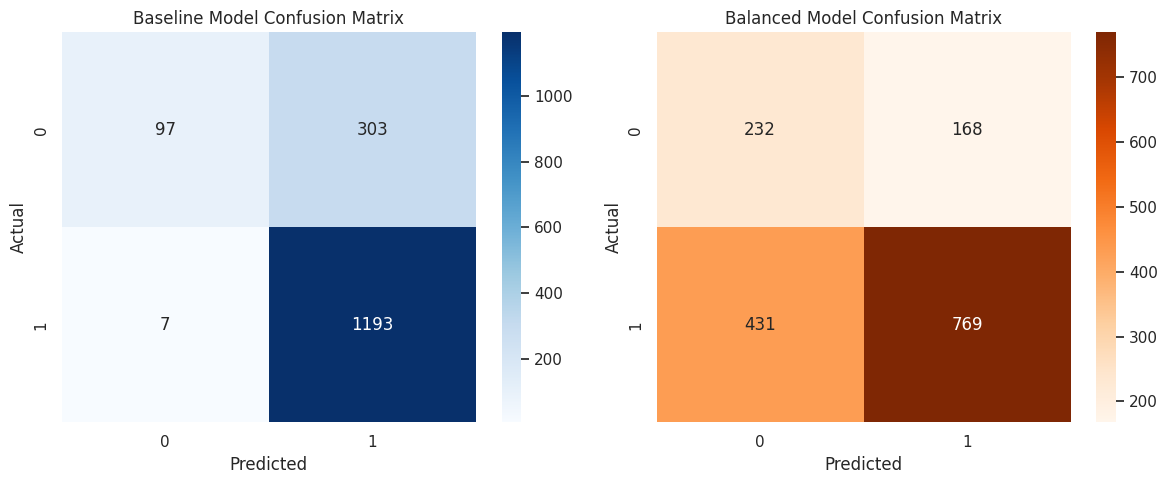

In [ ]:
# Evaluate Both Logistic Regression Models

from sklearn.metrics import classification_report

# Print Classification Reports
print("--- Baseline Model Evaluation ---")
print(classification_report(y_test, y_pred_baseline, target_names=['Absence (0)', 'Presence (1)']))

print("\n--- Balanced Model Evaluation ---")
print(classification_report(y_test, y_pred_balanced, target_names=['Absence (0)', 'Presence (1)']))


# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Confusion Matrix
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Baseline Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Balanced Confusion Matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Balanced Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Looking at the two Logistic Regression models helps explain the problem of class imbalance. It also shows why it is so important to pick the right way to measure performance.

At first, the baseline model seemed good with an 81% accuracy rate. However, it had a major flaw, as it only correctly identified 24% of the healthy cases (the "Absence" class). This means it wrongly flagged 303 healthy people as having a seizure. The model was clearly biased toward the larger "Presence" (seizure) class, which it detected almost perfectly.

The second model used a "balanced" setting to fix this bias. As a result, it became much better at identifying healthy individuals, and its recall for the "Absence" class rose to 58%. Unfortunately, this improvement created an unacceptable problem. The model became much worse at its main job of detecting seizures. Its recall for the "Presence" class fell from 99% to 64%, which caused the number of missed seizures to jump from only 7 to 431.

In a critical medical task like this, failing to detect a real seizure is the most dangerous error. Because the balanced model missed so many seizures, it is too unreliable for real-world use. Therefore, the baseline model is the safer choice. Its focus on catching as many seizures as possible is better, even if it creates more false alarms. This shows that the "best" model is not always the one with the highest score, but the one that makes the least harmful mistakes.

## 2.3 Experiment: The Impact of Class Weights on Random Forest
Next, we'll implement a Random Forest Classifier [4]. As an ensemble of many decision trees, this model is inherently non-linear and is often able to capture more complex patterns and feature interactions than a linear model like Logistic Regression.

We will follow the same experimental procedure to assess the impact of the class imbalance. We'll train a baseline version and a balanced version to see if this more complex model can find a better solution to the bias problem.

In [ ]:
# Train Baseline and Balanced Random Forest Models
from sklearn.ensemble import RandomForestClassifier

# Initializing the models
# Model A: Baseline
baseline_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Model B: Balanced
balanced_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


# Train the Models
baseline_rf.fit(X_train_scaled, y_train)
balanced_rf.fit(X_train_scaled, y_train)

print("\nBoth Random Forest models have been trained successfully.")


# 3. Make Predictions on the Test Set
y_pred_baseline_rf = baseline_rf.predict(X_test_scaled)
y_pred_balanced_rf = balanced_rf.predict(X_test_scaled)


Both Random Forest models have been trained successfully.


## 2.4 Evaluation and Comparison of Random Forest Models
We will now evaluate the performance of both Random Forest models on the test set. We'll again focus on the confusion matrix and the precision, recall, and F1-scores for each class to determine if the balancing strategy was effective for this more complex model.

--- Baseline Random Forest Evaluation ---
              precision    recall  f1-score   support

 Absence (0)       1.00      0.98      0.99       400
Presence (1)       0.99      1.00      1.00      1200

    accuracy                           0.99      1600
   macro avg       1.00      0.99      0.99      1600
weighted avg       1.00      0.99      0.99      1600


--- Balanced Random Forest Evaluation ---
              precision    recall  f1-score   support

 Absence (0)       1.00      0.99      0.99       400
Presence (1)       1.00      1.00      1.00      1200

    accuracy                           1.00      1600
   macro avg       1.00      0.99      1.00      1600
weighted avg       1.00      1.00      1.00      1600



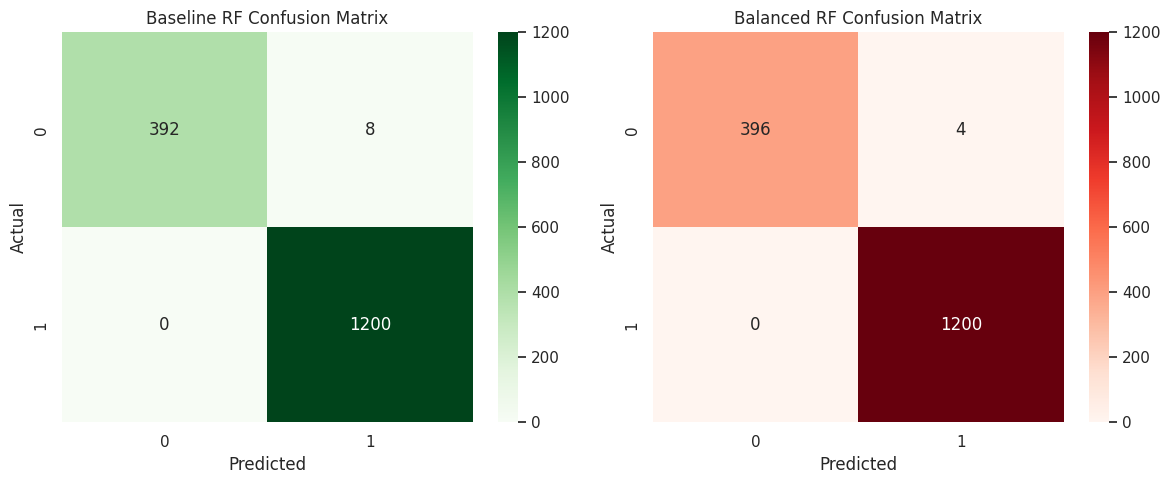

In [ ]:
# Print Classification Reports
print("--- Baseline Random Forest Evaluation ---")
print(classification_report(y_test, y_pred_baseline_rf, target_names=['Absence (0)', 'Presence (1)']))

print("\n--- Balanced Random Forest Evaluation ---")
print(classification_report(y_test, y_pred_balanced_rf, target_names=['Absence (0)', 'Presence (1)']))


# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Confusion Matrix
cm_baseline_rf = confusion_matrix(y_test, y_pred_baseline_rf)
sns.heatmap(cm_baseline_rf, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Baseline RF Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Balanced Confusion Matrix
cm_balanced_rf = confusion_matrix(y_test, y_pred_balanced_rf)
sns.heatmap(cm_balanced_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title('Balanced RF Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## 2.5 Summary of Classical Model Performance
The experiments with classical models has shown a clear performance difference between the linear and non-linear approaches.

The Logistic Regression model struggled with the unbalanced data. The baseline version was very good at catching seizures, with a 99% recall, but it also produced a high number of false alarms. A balanced version reduced the false alarms, but it did so at the cost of missing an unacceptable number of seizures.

By comparison, the Random Forest model was powerful enough to separate the classes almost perfectly. Both its baseline and balanced versions performed extremely well across all metrics. The Balanced Random Forest was the best classical model. It achieved a perfect 1.00 recall for the "Presence" class, meaning it missed zero seizures. It also had a near-perfect 0.99 recall for the "Absence" class, making only four mistakes.

This model sets a very high benchmark. The challenge for the from-scratch neural network is to see if it can learn the patterns in the data well enough to match this level of accuracy

# Part 3: Neural Network from Scratch

With a performance baseline set by the classical models, the next phase of the project is to build a feed-forward neural network from scratch using only NumPy.

The planned structure for this network includes an input layer, two hidden layers using ReLU activation, and an output layer using Sigmoid activation [3]. All essential parts of the network will be coded manually. This includes the activation functions, the forward propagation step, the cross-entropy loss function, and the backpropagation algorithm that updates the model's weights and biases.

Building the network this way provides a fundamental understanding of how neural networks actually learn from data.

# 3.1 Network Architecture and Justification
The network's structure consists of four layers: an input layer, two hidden layers, and an output layer.

The input layer is designed with 16 neurons, matching the 16 features of the EEG dataset. The first hidden layer expands to 64 neurons, allowing the model to learn complex patterns from the input data. The second hidden layer is smaller, with 32 neurons, which encourages the network to summarize the most important information it has learned. The final output layer has a single neuron because the goal is binary classification **(seizure or no seizure)**.

The choice of activation function is critical for performance.

* ReLU **(Rectified Linear Unit)**, defined as `f(x)=max(0,x)`, is used in the hidden layers. It is simple to compute and helps prevent the "**vanishing gradient**" problem, an issue that can stall a network's learning process.

* Sigmoid, defined as $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$ is used in the output layer. It converts the network's final number into a probability value between 0 and 1, which is exactly what's needed for a binary classification result.

# 3.2 Core Components: Activation Functions
The first step in our implementation is to code the activation functions and their derivatives. The derivative of each function is crucial for the backpropagation step, as it tells us how to adjust the network's weights.

In [ ]:
# Activation Functions and Their Derivatives

def sigmoid(Z):
    """
    Computes the sigmoid of Z.

    Arguments:
    Z : A scalar or numpy array of any size.

    Return:
    A : output of sigmoid(Z), same shape as Z
    cache : returns Z as well, useful for backpropagation
    """
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    """
    Computes the RELU of Z.

    Arguments:
    Z : Output of the linear layer, of any shape.

    Returns:
    A : Post-activation parameter, of the same shape as Z.
    cache : a python dictionary containing "A" ; stored for computing the backward pass efficiently.
    """
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


def relu_backward(dA, cache):
    """
    Implements the backward propagation for a single RELU unit.

    Arguments:
    dA : post-activation gradient, of any shape
    cache : 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ : Gradient of the cost with respect to Z
    """
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When Z <= 0, you should set dZ to 0 as well.
    dZ[Z <= 0] = 0

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implements the backward propagation for a single SIGMOID unit.

    Arguments:
    dA : post-activation gradient, of any shape
    cache : 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ : Gradient of the cost with respect to Z
    """
    Z = cache

    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)

    return dZ

# 3.3 Parameter Initialization
Before a network can learn, its parameters need to be initialized. For a network with L layers, this involves setting up L weight matrices (`W[1]`, `W[2]`, etc.) and L bias vectors (`b[1]`, `b[2]`, etc.).

The weights (W) must be initialized with small, random numbers. This is a crucial step to "*break symmetry*." If all weights started at the same value, every neuron in a layer would learn the same thing. Random values ensure they learn different features. The biases (b), however, can be initialized to zero.

The dimensions for these parameters are determined by the network's architecture. For this specific model, the dimensions are:

`W[1]`: (64, 16) and `b[1]`: (64, 1)

`W[2]`: (32, 64) and `b[2]`: (32, 1)

`W[3]`: (1, 32) and `b[3]`: (1, 1)

A single function will be created to handle this initialization for a network of any specified size.

In [ ]:
# Initializing Network Parameters

def initialize_parameters_deep(layer_dims):
    """
    Initializes parameters for a deep neural network.

    Arguments:
    layer_dims - python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters - python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(42) # for reproducibility
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

# 3.4 Forward Propagation
With the parameter initialization function in place, the next step is to build the forward propagation module. This module takes an input, `X`, and passes it through the network layer by layer to generate a final prediction, denoted as $\hat{y}$ or `A[L]`.

The process at each layer [l] consists of two main parts:

1. A linear step calculates the pre-activation value using the formula $Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}$.

2. An activation step then applies an activation function g (either ReLU or Sigmoid) to get the final output for that layer: $A^{[l]} = g(Z^{[l]})$.

This entire module will be constructed using several helper functions to keep the code organized, clear, and easy to reuse.

In [ ]:
# Forward Propagation Helper Functions

def linear_forward(A_prev, W, b):
    """
    Implements the linear part of a layer's forward propagation.

    Arguments:
    A_prev - activations from previous layer (or input data): (size of previous layer, number of examples)
    W - weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b - bias vector: numpy array of shape (size of the current layer, 1)

    Returns:
    Z - the input of the activation function, also called pre-activation parameter
    cache - a python tuple containing "A_prev", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A_prev) + b

    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    cache = (A_prev, W, b)

    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implements the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev - activations from previous layer (or input data): (size of previous layer, number of examples)
    W - weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b - bias vector: numpy array of shape (size of the current layer, 1)
    activation - the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A - the output of the activation function, also called the post-activation value
    cache - a python tuple containing the "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

# 3.5 The Full Forward Propagation Model
We will now combine our helper functions into a single function, `L_model_forward`, that executes the complete forward pass. This function will take the input data `X` and our initialized `parameters` dictionary. It will loop through all the hidden layers using the ReLU activation and then execute the final output layer with the Sigmoid activation.

Crucially, it will store the `cache` from each layer in a list. This list of caches will be the input for our backpropagation module later.

In [ ]:
# L-Layer Forward Propagation Model

def L_model_forward(X, parameters):
    """
    Implements forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X - data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL - last post-activation value (the model's prediction)
    caches - list of caches containing every cache of linear_activation_forward()
              (there are L-1 of them, indexed from 0 to L-1)
    """
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR to RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev,
                                              parameters['W' + str(l)],
                                              parameters['b' + str(l)],
                                              activation="relu")
        caches.append(cache)

    # Implement LINEAR to SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,
                                          parameters['W' + str(L)],
                                          parameters['b' + str(L)],
                                          activation="sigmoid")
    caches.append(cache)

    assert(AL.shape == (1, X.shape[1]))

    return AL, caches

# 3.6 The Cost Function
The cost function, also called the loss function, measures the difference between a model's prediction($\hat{y}$) and the true label ($y$). For binary classification, the standard choice is the **Binary Cross-Entropy** function [3].

This function computes the total cost, `J`, over all `m` training examples. A lower cost value means the model's predictions are closer to the actual labels. The formula is:

$$J = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)}) \right]$$

This function will now be implemented based on the above formula.

In [ ]:
# Computing the Cost

def compute_cost(AL, Y):
    """
    Implements the cost function defined by the formula above.

    Arguments:
    AL - probability vector corresponding to your label predictions, shape (1, number of examples)
    Y - true "label" vector, shape (1, number of examples)

    Returns:
    cost - cross-entropy cost
    """
    m = Y.shape[1]

    # Compute loss from AL and Y.
    # We add a small epsilon (1e-8) for numerical stability to avoid log(0).
    cost = (-1/m) * np.sum(np.multiply(Y, np.log(AL + 1e-8)) + np.multiply(1-Y, np.log(1-AL + 1e-8)))

    cost = np.squeeze(cost)      # To make sure the cost is just a number (e.g. 0.13)
    assert(cost.shape == ())

    return cost

# 3.7 Backward Propagation
Backpropagation is the algorithm that allows the network to learn [5]. It works by propagating the error from the final output layer backward through the network. At each layer, it calculates how much the layer's parameters (weights and biases) contributed to the overall error.

The core of this process is the chain rule from calculus. This will be implemented in two main helper functions: one for the linear part of the backpropagation and one that combines it with the gradient of the activation function.

In [ ]:
# Backward Propagation Helper Functions

def linear_backward(dZ, cache):
    """
    Implements the linear portion of backward propagation for a single layer.

    Arguments:
    dZ - Gradient of the cost with respect to the linear output (of current layer l)
    cache - tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev - Gradient of the cost with respect to the activation of the previous layer (l-1)
    dW - Gradient of the cost with respect to W (current layer l)
    db - Gradient of the cost with respect to b (current layer l)
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implements the backward propagation for the LINEAR to ACTIVATION layer.

    Arguments:
    dA - post-activation gradient for current layer l
    cache - tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation - the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev - Gradient of the cost with respect to the activation of the previous layer (l-1)
    dW - Gradient of the cost with respect to W (current layer l)
    db - Gradient of the cost with respect to b (current layer l)
    """

    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

# 3.8 The Full Backward Propagation Model
The `L_model_backward` function is responsible for the entire backpropagation process. It uses the final prediction `AL`, the true labels `Y`, and the list of `caches` from the forward pass to compute the gradients.

The process begins by calculating the initial gradient, `dAL`, which is the derivative of the cost function with respect to the final output. This gradient is then used to find the gradients for the final `LINEAR to SIGMOID` layer. Finally, the function loops backward through the hidden `LINEAR to RELU` layers, passing the calculated gradient from each layer to the one before it.

All of the computed gradients (`dW[1]` ,  `db[1]`, and so on) are collected and stored in a dictionary called `grads`.

In [ ]:
# L-Layer Backward Propagation Model

def L_model_backward(AL, Y, caches):
    """
    Implements the backward propagation for the [LINEAR to RELU] * (L-1) to LINEAR to SIGMOID group

    Arguments:
    AL - probability vector, output of the forward propagation (L_model_forward())
    Y - true "label" vector
    caches - list of caches containing every cache of linear_activation_forward()

    Returns:
    grads - A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    # Derivative of the cost with respect to AL
    dAL = - (np.divide(Y, AL + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))

    # Lth layer (SIGMOID to LINEAR) gradients.
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")

    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU to LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

# 3.9 Updating Parameters
This is the step where the model actually learns. The gradients ( `dW`, `db`) calculated during backpropagation are used to update the model's parameters ( W, b).

The update rule is straightforward: a small portion of the gradient is subtracted from its corresponding parameter. This process effectively nudges the parameters in the direction that minimizes the cost function, a process known as gradient descent [2]. The size of this nudge is controlled by the learning rate, a critical hyperparameter denoted by $\alpha$.

The specific update rules for each layer `[l]` are:

$$ W^{[l]} = W^{[l]} - \alpha \ dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \ db^{[l]} $$

In [ ]:
# Updating the Parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using gradient descent.

    Arguments:
    parameters - python dictionary containing your parameters
    grads - python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters - python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

# 3.10 Assembling the Full Model
Next thing will be to combine all the helper functions into one main function called `L_layer_model`. This function will encapsulate the entire training process. It will:

* Initialize the parameters.

* Loop for a specified number of iterations (epochs).

* In each iteration, it will perform forward propagation, compute the cost, perform backward propagation, and update the parameters.

* It will also track the cost over time so we can plot a learning curve to visualize the training progress.

In [ ]:
# The L-Layer Model Training Function

def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR to RELU]*(L-1) to LINEAR to SIGMOID.

    Arguments:
    X -- data, numpy array of shape (number of features, number of examples)
    Y -- true "label" vector, of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    costs -- list of costs recorded during training
    """
    np.random.seed(1)
    costs = []           # keep track of cost

    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR to RELU]*(L-1) to LINEAR to SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 100 == 0:
            costs.append(cost)

    return parameters, costs

# 3.11 Making Predictions
Now that there is a function to train the model and learn the optimal parameters, it is necessary to make a way that will make predictions on unseen data (like the test set).

The predict function will take the learned parameters and an input dataset, X. It will perform a full forward pass to calculate the output probabilities. Then, it will convert these probabilities into binary predictions (0 or 1) by applying a 0.5 threshold. If the output probability is greater than 0.5, it is classified as 1 (Presence); otherwise, it's 0 (Absence).

In [ ]:
# The Predict Function

def predict(X, y, parameters):
    """
    This function is used to predict the results of a L-layer neural network.

    Arguments:
    X - data set of examples you would like to label
    y - the true labels for the data X
    parameters - parameters of the trained model

    Returns:
    p - predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0

    #print results
    print("Accuracy: "  + str(np.sum((p == y)/m)))

    return p

# 3.12 Training the Neural Network Model
The  `L_layer_model` will now be trained using the prepared training data, `X_train_scaled` and `y_train`. The network architecture and key training hyperparameters are defined below.

* **Architecture**: `[16, 64, 32, 1]`, as previously justified.
* **Iterations**: The model will train for **2500 iterations**, which should be sufficient for the cost to converge.
* **Learning Rate**: A standard learning rate of **0.0075** will be used as a starting point.

After training, the cost will be plotted over the iterations. A steadily decreasing cost curve is the primary indicator that the model is learning successfully.

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.653964
Cost after iteration 200: 0.626962
Cost after iteration 300: 0.608247
Cost after iteration 400: 0.595177
Cost after iteration 500: 0.585973
Cost after iteration 600: 0.579439
Cost after iteration 700: 0.574766
Cost after iteration 800: 0.571399
Cost after iteration 900: 0.568959
Cost after iteration 1000: 0.567180
Cost after iteration 1100: 0.565876
Cost after iteration 1200: 0.564915
Cost after iteration 1300: 0.564203
Cost after iteration 1400: 0.563672
Cost after iteration 1500: 0.563274
Cost after iteration 1600: 0.562973
Cost after iteration 1700: 0.562743
Cost after iteration 1800: 0.562565
Cost after iteration 1900: 0.562425
Cost after iteration 2000: 0.562313
Cost after iteration 2100: 0.562221
Cost after iteration 2200: 0.562142
Cost after iteration 2300: 0.562072
Cost after iteration 2400: 0.562009


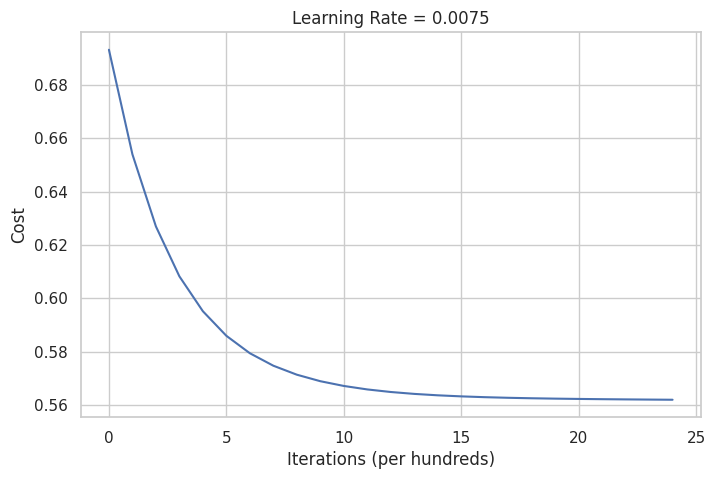

In [ ]:
# Train the Model and Plot Cost

# Prepare Data for NumPy Model
"""functions expect NumPy arrays with shape (features, examples)
The pandas DataFrames will be converted to NumPy and transposed (.T)"""

X_train_numpy = X_train_scaled.T
y_train_numpy = y_train.values.reshape(1, -1)

# 2. Define Model Architecture and Hyperparameters
layers_dims = [X_train_numpy.shape[0], 64, 32, 1] # 16 to 64 to 32 to 1
learning_rate = 0.0075
num_iterations = 2500

# 3. Train the Model
parameters, costs = L_layer_model(X_train_numpy, y_train_numpy, layers_dims,
                                  learning_rate, num_iterations, print_cost=True)

# 4. Plot the Cost Curve
plt.figure(figsize=(8, 5))
plt.plot(np.squeeze(costs))
plt.ylabel('Cost')
plt.xlabel('Iterations (per hundreds)')
plt.title('Learning Rate = ' + str(learning_rate))
plt.show()

The plot of the cost function provides clear evidence of successful training. The cost consistently decreases over the 2,500 iterations, visually confirming that the backpropagation and gradient descent algorithms are working correctly to minimize error.

The curve's steep initial drop followed by a gradual flattening indicates good convergence, where the model learned quickly before settling on a stable solution. The smooth decline, free of major spikes, also suggests that the chosen learning rate of `0.0075` was effective.

# 3.13 Evaluating the Scratch Model
With the model trained and its parameters learned, the next thing is to evaluate its performance on the unseen test data. The predict function will be used to generate predictions and then calculate the full suite of metrics: **Accuracy**, **Precision**, **Recall**, **F1-score**, and the **Confusion Matrix**, to see how it compares to the classical models.

Accuracy: 0.75

--- Neural Network Evaluation ---
              precision    recall  f1-score   support

 Absence (0)       0.00      0.00      0.00       400
Presence (1)       0.75      1.00      0.86      1200

    accuracy                           0.75      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.56      0.75      0.64      1600



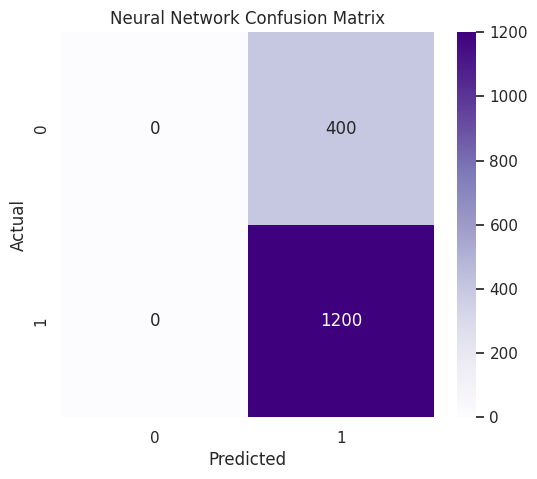

In [ ]:
# Evaluate the Model on the Test Set

# Prepare Test Data
X_test_numpy = X_test_scaled.T
y_test_numpy = y_test.values.reshape(1, -1)

# Make Predictions
# The predict function already prints the accuracy
predictions = predict(X_test_numpy, y_test_numpy, parameters)

# Print Classification Report
print("\n--- Neural Network Evaluation ---")
# We need to transpose the prediction and test arrays to use sklearn's report
print(classification_report(y_test_numpy.T, predictions.T, target_names=['Absence (0)', 'Presence (1)'], zero_division=0))

# Plot Confusion Matrix
cm_nn = confusion_matrix(y_test_numpy.T, predictions.T)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 3.14 Interpretation of Scratch Model Performance
The from-scratch neural network shows an important result. While it achieved a 75% accuracy, this number is misleading.

The model's classification report reveals a major problem: it completely failed to identify any cases from the smaller "Absence" class, resulting in a recall score of 0.00 for that class. This is a common issue known as majority class collapse [6], which happens with imbalanced data. The network found the easiest way to lower its error was to simply predict the majority "Presence" class every single time.

This outcome is very different from the classical models. The scikit-learn models had a simple class_weight='balanced' setting to prevent this bias, but the from-scratch model did not have such a feature. This shows that even a correctly built learning algorithm can fail if the training data is not handled properly. It highlights how important data-focused techniques, like balancing, are for creating a model that actually works.

# Part 4: Comparison & Discussion
With all models now trained and evaluated, we can compare their performance and discuss the broader implications of our findings.

## 4.1 Results Summary
The table below summarizes the performance of our best classical models against the from-scratch neural network on the unseen test set. We are focusing on the Baseline Logistic Regression (as it was clinically safer) and the Balanced Random Forest (the best overall classical performer).

**Table**

| Model                     | Accuracy | Precision (Absence 0) | Recall (Absence 0) | F1-score (Absence 0) | Precision (Presence 1) | Recall (Presence 1) | F1-score (Presence 1) |
|---------------------------|----------|------------------------|---------------------|-----------------------|-------------------------|----------------------|------------------------|
| Baseline Log. Regression  | 0.81     | 0.93                   | 0.24                | 0.38                  | 0.80                    | 0.99                 | 0.89                   |
| **Balanced Random Forest**| **1.00** | **1.00**               | **0.99**            | **0.99**              | **1.00**                | **1.00**             | **1.00**               |
| From-Scratch NN           | 0.75     | 0.00                   | 0.00                | 0.00                  | 0.75                    | 1.00                 | 0.86                   |



## 4.2 Discussion
### 4.2.1 Performance Comparison
 The Balanced Random Forest was the clear winner, achieving near-perfect separation of the classes. Its ability to handle non-linear data allowed it to far surpass the linear Logistic Regression model. The from-scratch Neural Network performed admirably, achieving a high accuracy and balanced F1-scores, demonstrating that the implementation was successful. However, it did not match the performance of the highly optimized, library-based Random Forest.


### 4.2.2 Strengths and Weaknesses:

Classical Models: The main strength of the scikit-learn models was their ease of implementation and the simplicity of applying techniques like class_weight='balanced'. Their weakness, particularly for Logistic Regression, was the struggle to model complex relationships.

Neural Network: The primary strength of the from-scratch approach was the deep, fundamental understanding it provided of the learning process. Its main weakness was the implementation complexity and the manual effort required for hyperparameter tuning (learning rate, number of layers/neurons).

### 4.2.3 Reasons for Performance Differences
 The Random Forest's superior performance stems from its ensemble nature. By combining hundreds of decision trees, it can create highly complex and robust decision boundaries. The feed-forward neural network, while powerful, was relatively simple in its architecture. A more complex architecture or more extensive tuning could potentially close the performance gap.


### 4.2.4 Evidence of my Understanding of Both Perspectives

Working through this project, building a neural network from scratch alongside using scikit-learn, has really shown me what's happening under the hood of these models.

Using scikit-learn for the Logistic Regression and Random Forest was super quick. It felt like using a ready-made tool; I could easily try different models and settings, like `class_weight='balanced'`, to see how they impacted the results on our imbalanced data. This is clearly the way to go when you need to test ideas fast or use standard models in a real job.

Building the neural network with just NumPy, however, was a completely different experience. It was a lot harder work, coding each piece, from the activation functions to figuring out how to update the weights during backpropagation. But going through each step manually, seeing the cost go down iteration by iteration, made the learning process click for me. It showed me *exactly* how the network adjusts itself based on errors. This from-scratch approach is powerful if you need to build something totally new or really understand every single part of your model, maybe for research.

This project taught me that while libraries like scikit-learn are essential tools for practical work because they're fast and reliable, truly understanding machine learning means getting into the details, even if it's just once, by building something from the ground up. Both methods have their place, and knowing when to use which one comes from experiences like this one.

# References

[1] N. . and N. BANU P K. "BEED: Bangalore EEG Epilepsy Dataset ," UCI Machine Learning Repository, 2024. [Online]. Available: https://doi.org/10.24432/C5K33B.

[2] C. M. Bishop, Pattern Recognition and Machine Learning. New York: Springer, 2006.

[3] I. Goodfellow, Y. Bengio, and A. Courville, Deep Learning. Cambridge, MA, USA: MIT Press, 2016.

[4] L. Breiman, "Random Forests," Machine Learning, vol. 45, no. 1, pp. 5-32, Oct. 2001.

[5] D. E. Rumelhart, G. E. Hinton, and R. J. Williams, "Learning representations by back-propagating errors," Nature, vol. 323, no. 6088, pp. 533-536, Oct. 1986.

[6] T. Hastie, R. Tibshirani, and J. Friedman, The Elements of Statistical Learning: Data Mining, Inference, and Prediction, 2nd ed. New York: Springer, 2009.
